In [8]:
# Import required Libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [9]:
# reading the datafile
df = pd.read_csv('../Data/Watson_healthcare.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
def features (df):
    columns_to_drop=['EmployeeID','EmployeeCount','Gender','JobSatisfaction','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours']
    df.drop(columns=columns_to_drop, inplace=True)
    df['BusinessTravel'] = np.where(df['BusinessTravel'] == 'Travel_Frequently', 1, 0)
    df['Education']= np.where(df['Education'] == 5, 1, 0)
    df['EducationField'] = np.where((df['EducationField'] == "Life Sciences") | (df['EducationField'] == "Medical") | (df['EducationField'] == "Other"), 1, 0)
    df['EnvironmentSatisfaction'] = np.where(df['EnvironmentSatisfaction'] == 1, 1, 0)
    df['JobInvolvement'] = np.where((df['JobInvolvement'] == 1)|(df['JobInvolvement'] == 2), 1, 0)
    df['JobLevel'] = np.where(df['JobLevel'] == 1, 1, np.where(df['JobLevel'] == 2, 2, np.where(df['JobLevel'] == 4, 2, 0)))
    df['JobRole'] = np.where((df['JobRole'] == 'Nurse') | (df['JobRole']== "Other") , 1, 0)
    df['MaritalStatus']= np.where((df['MaritalStatus'] == 'Single'), 1, 0)
    df['Shift']= np.where((df['Shift'] == 0) | (df['Shift']== 3) , 1, 0)
    df['WorkLifeBalance']= np.where(df['WorkLifeBalance'] == 1, 1, 0)
    df['Attrition']= df['Attrition'].replace({'No':0,'Yes':1})
    df['OverTime']= df['OverTime'].replace({'No':0,'Yes':1})
    return df


In [12]:
# import Features1 as fe
# import numpy as np
# fe.features(df)


In [13]:
features (df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,Cardiology,1,0,1,0,94,...,8,1,1,8,0,1,6,4,0,5
1,49,0,1,279,Maternity,8,0,1,0,61,...,1,0,0,10,3,0,10,7,1,7
2,37,1,0,1373,Maternity,2,0,1,0,92,...,6,1,1,7,3,0,0,0,0,0
3,33,0,1,1392,Maternity,3,0,1,0,56,...,1,1,1,8,3,0,8,7,3,0
4,27,0,0,591,Maternity,2,0,1,1,40,...,9,0,0,6,3,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,0,471,Neurology,24,0,0,0,66,...,1,1,1,1,3,1,1,0,0,0
1672,46,0,0,1125,Cardiology,10,0,0,0,94,...,2,1,0,15,3,0,3,2,1,2
1673,20,0,0,959,Maternity,1,0,1,0,83,...,1,0,1,1,0,0,1,0,0,0
1674,39,0,0,466,Neurology,1,0,1,0,65,...,1,0,0,21,3,0,21,6,11,8


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier

In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'Shift', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
!pip install imbalanced-learn

In [17]:
#Define the target

X= df.drop('Attrition',axis=1)
y= df['Attrition']

In [18]:



# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), ['Department', 'JobLevel']),
    ],
    remainder='passthrough'
)

# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(X)

# Get the feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert the transformed data to a DataFrame with column labels
transformed_X = pd.DataFrame(transformed_data, columns=feature_names)
# other_X= df[['BusinessTravel','Education','EducationField','EnvironmentSatisfaction','JobInvolvement','JobRole','MaritalStatus','Shift','OverTime','WorkLifeBalance']]
# X_scaled= pd.concat([transformed_X, other_X], axis=1)

# X_scaled.head()
transformed_X.head()


,num__Age,num__DailyRate,num__DistanceFromHome,num__HourlyRate,num__MonthlyIncome,num__MonthlyRate,num__NumCompaniesWorked,num__TotalWorkingYears,num__TrainingTimesLastYear,num__YearsAtCompany,...,remainder__BusinessTravel,remainder__Education,remainder__EducationField,remainder__EnvironmentSatisfaction,remainder__JobInvolvement,remainder__JobRole,remainder__MaritalStatus,remainder__OverTime,remainder__Shift,remainder__WorkLifeBalance
0,0.452933,0.750837,-1.008126,1.412260,-0.110748,0.727502,2.154939,-0.426280,-2.178097,-0.169491,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.329511,-1.299105,-0.149829,-0.221278,-0.293315,1.488074,-0.671100,-0.170938,0.151012,0.486551,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.014644,1.425849,-0.885512,1.313258,-0.936423,-1.666173,1.347499,-0.553950,0.151012,-1.153553,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,-0.423644,1.473174,-0.762898,-0.468784,-0.763164,1.243144,-0.671100,-0.426280,0.151012,0.158530,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,-1.081078,-0.521970,-0.885512,-1.260803,-0.644909,0.328579,2.558659,-0.681621,0.151012,-0.825533,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
transformed_X.columns

Index(['num__Age', 'num__DailyRate', 'num__DistanceFromHome',
       'num__HourlyRate', 'num__MonthlyIncome', 'num__MonthlyRate',
       'num__NumCompaniesWorked', 'num__TotalWorkingYears',
       'num__TrainingTimesLastYear', 'num__YearsAtCompany',
       'num__YearsInCurrentRole', 'num__YearsSinceLastPromotion',
       'num__YearsWithCurrManager', 'cat__Department_Cardiology',
       'cat__Department_Maternity', 'cat__Department_Neurology',
       'cat__JobLevel_0', 'cat__JobLevel_1', 'cat__JobLevel_2',
       'remainder__BusinessTravel', 'remainder__Education',
       'remainder__EducationField', 'remainder__EnvironmentSatisfaction',
       'remainder__JobInvolvement', 'remainder__JobRole',
       'remainder__MaritalStatus', 'remainder__OverTime', 'remainder__Shift',
       'remainder__WorkLifeBalance'],
      dtype='object')

In [20]:
from imblearn.over_sampling import SMOTE

# Assuming you have separate X (features) and y (target) variables
smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(transformed_X, y)



In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42, stratify=y)

X_train, y_train = smote.fit_resample(X_train, y_train)


# Modeling
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)





Training Accuracy: 0.9678238780694327
Testing Accuracy: 0.9226190476190477


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       296
           1       0.67      0.70      0.68        40

    accuracy                           0.92       336
   macro avg       0.81      0.83      0.82       336
weighted avg       0.92      0.92      0.92       336



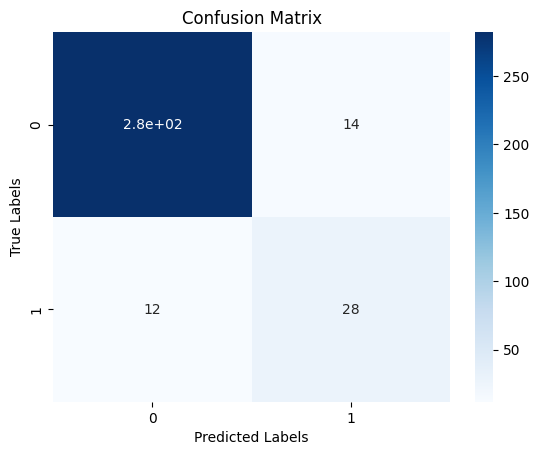

In [22]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




In [23]:
from sklearn.model_selection import GridSearchCV

# Create the AdaBoostClassifier
model = AdaBoostClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Best Parameters:  {'learning_rate': 0.5, 'n_estimators': 100}
Best Score:  0.9492215214820655
Training Accuracy: 0.9695173581710415
Testing Accuracy: 0.9107142857142857


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       296
           1       0.61      0.68      0.64        40

    accuracy                           0.91       336
   macro avg       0.78      0.81      0.80       336
weighted avg       0.91      0.91      0.91       336



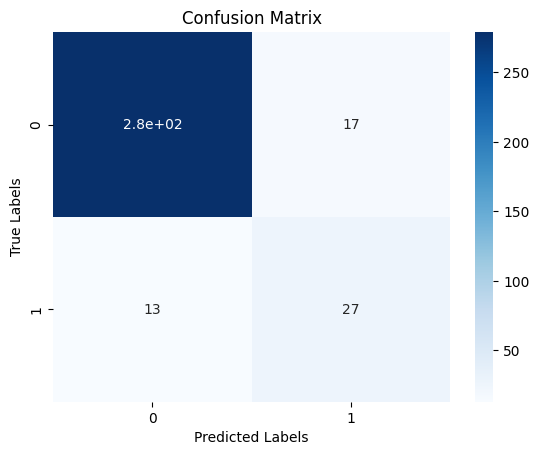

In [24]:
# Make predictions on the testing data
y_pred = best_model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()